In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [152]:
dataset = pd.read_csv('Chicago AoT Monthly Aggregates.csv')
node_zips = pd.read_csv('NodeswZip.csv')
elpc = pd.read_csv('elpc.c')

In [153]:
sensors = ['apds_9006_020','at0','at1','at2','at3','bmp180','chemsense','co','failures','h2s', 'hih4030',
              'hih6130','hmc5883l','htu21d','loadavg','lps25h','mem','metsense','microphone','ml8511','mlx75305',
              'mma8452q','net_broadband','net_lan','net_usb','no2','o3','opc_n2','oxidizing_gases','pms7003',
              'pr103j2','reducing_gases','sht25','si1145','so2','spv1840lr5h_b','temperatures','tmp112','tmp421',
              'tsl250rd','tsl260rd','tsys01','uptime']
parameters = ['bins','concentration','fw', 'humidity','intensity','load_1','load_10','load_5']

In [154]:
dataset = dataset[dataset['sensor'].isin(sensors)]
#dataset = dataset[dataset['parameter'].isin(parameters)]
dataset = dataset[(dataset['timestamp'] != 'timestamp')]
dataset.head()

,timestamp,node_id,subsystem,sensor,parameter,avg_value_hrf
0,1525989600,001e06113107,chemsense,co,concentration,-0.455178
1,1525989600,001e0610ee82,chemsense,at3,temperature,19.3771
2,1525989600,001e0611536c,lightsense,tsl250rd,intensity,23.3345
3,1525989600,001e0610ee43,metsense,htu21d,temperature,14.8585
4,1525989600,001e0610f6dd,metsense,htu21d,temperature,17.9636


In [155]:
dataset['datetime'] = pd.to_datetime(dataset['timestamp'], unit='s')
dataset['avg_value_hrf'] = pd.to_numeric(dataset['avg_value_hrf'])
dataset.head()

,timestamp,node_id,subsystem,sensor,parameter,avg_value_hrf,datetime
0,1525989600,001e06113107,chemsense,co,concentration,-0.455178,2018-05-10 22:00:00
1,1525989600,001e0610ee82,chemsense,at3,temperature,19.377097,2018-05-10 22:00:00
2,1525989600,001e0611536c,lightsense,tsl250rd,intensity,23.334481,2018-05-10 22:00:00
3,1525989600,001e0610ee43,metsense,htu21d,temperature,14.858500,2018-05-10 22:00:00
4,1525989600,001e0610f6dd,metsense,htu21d,temperature,17.963645,2018-05-10 22:00:00


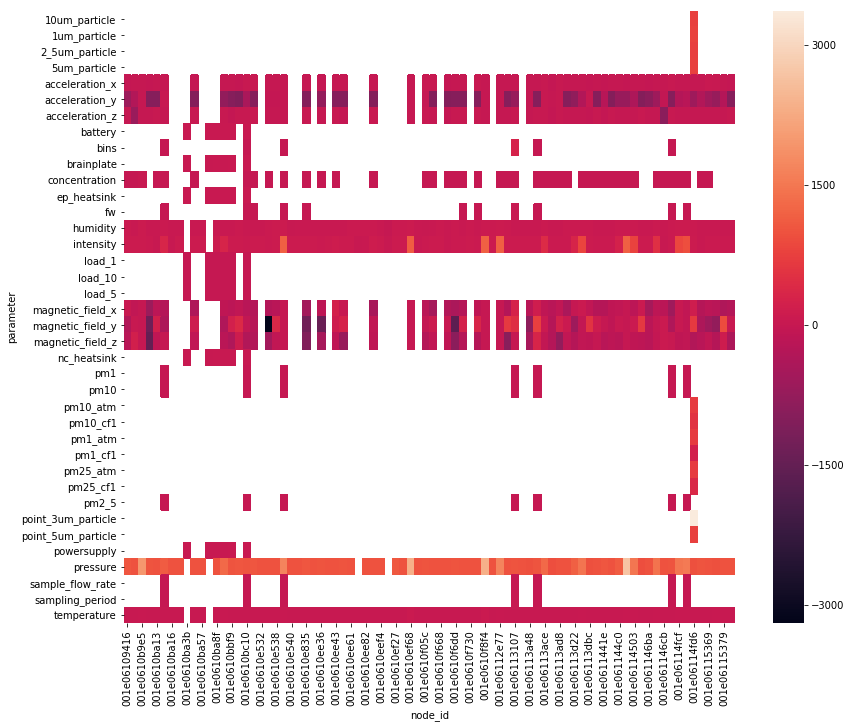

In [156]:
pivot_table = pd.pivot_table(data=dataset,
                            index='parameter',
                            columns='node_id',
                            values='avg_value_hrf')

dims = (13.7, 11.27)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(pivot_table)

In [157]:
pm25_aot = dataset[(dataset['parameter'] == 'pm2_5')]
pm25_aot.head()

,timestamp,node_id,subsystem,sensor,parameter,avg_value_hrf,datetime
1825,1525622400,001e06113107,alphasense,opc_n2,pm2_5,5.736420,2018-05-06 16:00:00
1971,1525431600,001e06113107,alphasense,opc_n2,pm2_5,2.438958,2018-05-04 11:00:00
2414,1525820400,001e06113107,alphasense,opc_n2,pm2_5,3.100476,2018-05-08 23:00:00
4079,1525694400,001e06113107,alphasense,opc_n2,pm2_5,3.665500,2018-05-07 12:00:00
5336,1525892400,001e06113107,alphasense,opc_n2,pm2_5,2.042448,2018-05-09 19:00:00


To begin matching ELPC data to the AoT, we attach zip code to the node, and remove any zero readings.

In [165]:
pm25wZip = pm25_aot.merge(node_zips,
                         how='outer',
                         on='node_id',
                         copy='false')
pm25wZip = pm25wZip[pm25wZip['avg_value_hrf'] >=0]

In [166]:
pm25wZip['zipcode'].unique()

array([60652, 60644, 60619, 60608, 60617, 60610, 60637])